In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

In [3]:
# np.random.seed(42)
# tf.keras.utils.set_random_seed(42)

In [4]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available:", gpus)
else:
    print("No GPU found.")

No GPU found.


In [5]:
print(f"TensorFlow Version: {tf.__version__}")
print(f"Built with CUDA: {tf.test.is_built_with_cuda()}")
print(f"Available GPUs: {tf.config.list_physical_devices('GPU')}")

TensorFlow Version: 2.19.0
Built with CUDA: False
Available GPUs: []


In [6]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [7]:
print(X_train)
print(y_train)

[[ 1.55508243  0.84801682]
 [-5.33749882  1.03397255]
 [-4.09353183  0.67843096]
 ...
 [-0.84437575 -1.94991543]
 [ 5.0377068  -2.92221685]
 [ 0.38198674  1.49735733]]
[2 0 0 ... 1 3 2]


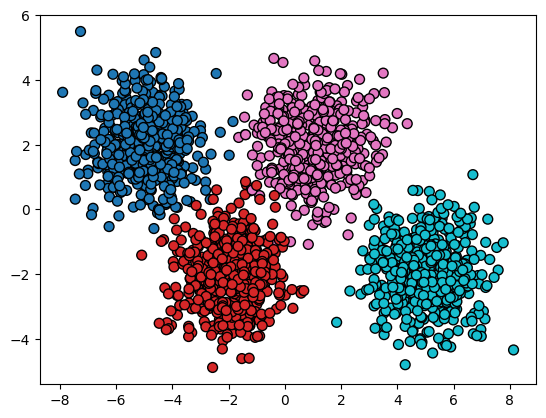

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab10', edgecolor='k', s=50, label='Train points')

In [9]:
hidden_layer = "relu"
output_layer = "linear"
# setting output to linear and setting from_logits = True results in better numerical accuracy

model = Sequential([
    keras.Input(shape = (X_train.shape[1],)),
    Dense(units = 25, activation=hidden_layer),
    Dense(units = 15, activation=hidden_layer),
    Dense(units = 4, activation=output_layer)]
    )

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#this is equivalent to using softmax
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

print(model.layers[0].get_weights())

[array([[-0.1443662 ,  0.36084393, -0.45590326,  0.18374225, -0.33134526,
         0.03122106, -0.10122323,  0.17910972, -0.27532208, -0.17726514,
         0.3159862 , -0.14916411,  0.36315343, -0.43235427, -0.09575877,
         0.20860824,  0.47042444, -0.20963866,  0.40165398, -0.22358982,
         0.0415515 , -0.09729224, -0.1262379 , -0.34959373, -0.21962488],
       [-0.37200212,  0.27744868,  0.26106647,  0.02078974,  0.4202831 ,
        -0.02774689, -0.1786668 ,  0.42809185, -0.11025211,  0.21699414,
         0.26792964, -0.38186002,  0.04851934,  0.23910144, -0.26444787,
         0.12777069, -0.22491166,  0.20240465, -0.20949781, -0.28994918,
        -0.10192209, -0.12939385, -0.3747489 , -0.32190537,  0.2825319 ]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]


In [12]:
model.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3485 
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5855  
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2513  
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1200
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0809  
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.0616
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.0548
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0483
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.0424
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0383
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0371 
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.0387
Epoch 13/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.0306
Epoch 14/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.0346
Epoch 15/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [13]:
print(model.layers[0].get_weights())

[array([[-0.04894636,  0.5912927 , -0.3531782 ,  0.1866019 , -0.6176114 ,
         0.26960158, -0.12982202,  0.2664935 , -0.44106162, -0.09455259,
         0.6133719 , -0.06571264,  0.45249492, -0.7565043 , -0.11673422,
         0.26387495,  0.6311129 , -0.15465266,  0.6469208 , -0.05340799,
         0.288573  , -0.10359006, -0.30902234, -0.67872953,  0.01965045],
       [-0.5370671 ,  0.45324782,  0.56930494, -0.20769978,  0.51036984,
        -0.29166326, -0.24040827,  0.5051816 , -0.25979546,  0.5534043 ,
         0.13654177, -0.64268535, -0.0349438 ,  0.38892496, -0.21490318,
         0.01486542, -0.20838702,  0.32111776, -0.4999427 , -0.51151305,
        -0.23755255, -0.2292147 , -0.31675124, -0.19058071,  0.23148806]],
      dtype=float32), array([ 0.28227547,  0.48077562,  0.21817246, -0.25078508, -0.50263983,
       -0.34685835,  0.44716474,  0.60616887,  0.31148273,  0.2220994 ,
        0.16926941,  0.79498976, -0.00884973, -0.26277637,  0.40226296,
       -0.1736185 ,  0.30779

In [14]:
logits = model.predict(X_train)
f_x = tf.nn.softmax(logits)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step


In [15]:
from matplotlib.colors import ListedColormap

In [16]:
X_min, X_max = X_train[:, 0].min(), X_train[:, 0].max()
Y_min, Y_max = X_train[:, 1].min(), X_train[:, 1].max()
xx, yy = np.meshgrid(np.linspace(X_min, X_max, num=100), np.linspace(Y_min, Y_max, num=100))
X_range = np.c_[xx.ravel(), yy.ravel()]
y_predict = model.predict(X_range)
bicolor_map = ListedColormap(["#000000", "#FFFB26"])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step


In [17]:
print(y_predict)
print(y_predict.shape)

[[  2.2825446   24.69754     -8.063445    -8.784896  ]
 [  1.7438836   24.759043    -7.57359     -8.755841  ]
 [  1.2052209   24.820547    -7.08373     -8.726785  ]
 ...
 [-19.146816   -13.9075365   12.844499    -2.1317809 ]
 [-19.015987   -14.107776    12.44937     -1.481402  ]
 [-18.885157   -14.308018    12.054242    -0.83102244]]
(10000, 4)


In [18]:
y_predict = [np.argmax(i) for i in y_predict]
print(y_predict)

[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3)

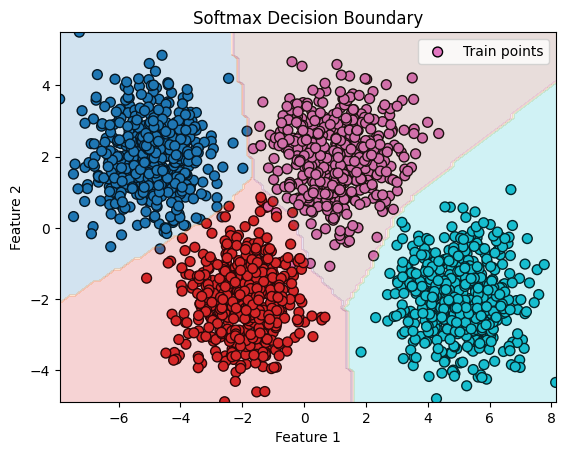

In [19]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab10', edgecolor='k', s=50, label='Train points')
plt.contourf(xx, yy, np.array(y_predict).reshape(xx.shape), alpha=0.2, cmap='tab10')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Softmax Decision Boundary')
plt.legend()
plt.show()